In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
H = 0.25
L = 1

alpha = 207*10**(-6) #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 1.43E-7  #Thermal diffusivity of water
c = k/D
rho_i = 1000   #Density of water @ 20 C

L = 1
H = 0.001

nxy = 101
nt = 6000

dxy = H/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)
ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y
#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (ReC*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*(To + (H-ya)/H*(70-To))
#Ti[-1,:] = To + 50

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = rho[:,:] * (H-ya[:,:]) * g

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',To+delT)
print(v)
#print('x =', x, 'y =', y)

delT = 120.92877677020469 Tl = 140.9287767702047
[[  4.05457457e-07   4.05457457e-07   4.05457457e-07 ...,   4.05457457e-07
    4.05457457e-07   4.05457457e-07]
 [  4.04055450e-07   4.04055450e-07   4.04055450e-07 ...,   4.04055450e-07
    4.04055450e-07   4.04055450e-07]
 [  4.06883369e-07   4.06883369e-07   4.06883369e-07 ...,   4.06883369e-07
    4.06883369e-07   4.06883369e-07]
 ..., 
 [  9.81359599e-07   9.81359599e-07   9.81359599e-07 ...,   9.81359599e-07
    9.81359599e-07   9.81359599e-07]
 [  9.93275020e-07   9.93275020e-07   9.93275020e-07 ...,   9.93275020e-07
    9.93275020e-07   9.93275020e-07]
 [  1.00541442e-06   1.00541442e-06   1.00541442e-06 ...,   1.00541442e-06
    1.00541442e-06   1.00541442e-06]]


In [3]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print(dt)

0.001


In [4]:
print(dxy)

1e-05


In [5]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, k, c, g, ya, H, delT, nt, dt, dxy, nxy):
    
    for n in range(nt):

        un = u.copy()
        u_star = un.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        
        u_star[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-u[1:-1,1:-1]/(2*dxy) * (u[2:,1:-1] - u[:-2,1:-1] + u[1:-1,2:] - un[1:-1,:-2])\
                            + v[1:-1,1:-1]/(dxy**2) * (un[2:,1:-1] + un[:-2,1:-1] + un[1:-1,2:] + un[1:-1,:-2] - 4*un[1:-1,1:-1])\
                                                 + rho[1:-1,1:-1]/rho_i * g + (1/(rho_i*dxy))*(pn[2:,1:-1]-pn[-2,1:-1]\
                                                                                             +pn[1:-1,2:]-pn[1:-1,:-2]))
        
        u_star[-1,:] = 0 #Top Boundary
        u_star[0,:] = 0   #Bottom Boundary
        
        p[1:-1,1:-1] = pn[1:-1,1:-1] + 1/(2*dt*dxy) * (u_star[2:,1:-1] - u_star[:-2,1:-1] + u_star[1:-1,2:] - u_star[1:-1,:-2])\
        
        
        u[1:-1,1:-1] = u_star[1:-1,1:-1] - dt/(2*dxy)*(p[2:,1:-1] - p[:-2,1:-1] + p[1:-1,2:] - p[1:-1,:-2])
        
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary
        
        T[1:-1,1:-1] = T[1:-1,1:-1] + dt*(-u[1:-1,1:-1]/(2*dxy) * (T[2:,1:-1]-T[:-2,1:-1]+T[1:-1,2:]-T[1:-1,:-2])\
                                         + k/(rho[1:-1,1:-1]*c*dxy**2) * (T[2:,1:-1] + T[:-2,1:-1] + T[1:-1,2:] + T[1:-1,:-2]\
                                                                         -4*T[1:-1,1:-1]))
    
        T[0,:] = To + 50 #Bottom Boundary
        T[-1,:] = To   #top Boundary
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - To))
        
        v[1:-1,1:-1] = 2.414*10**(-5) * 10**(247.8/(T[1:-1,1:-1] + 273 - 140)) / rho[1:-1,1:-1]
        
        
        #del u = 0
        #u[1:,1:] = 0.5*(u[:-1,1:] + u[1:,:-1])
        
        

                                           
    return u, T

In [6]:
u, T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,k,c,g,ya,H,delT,nt,dt,dxy,nxy)

C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: overflow encountered in true_divide
C:\Users\amiya\Anaconda3\lib\site-packages\

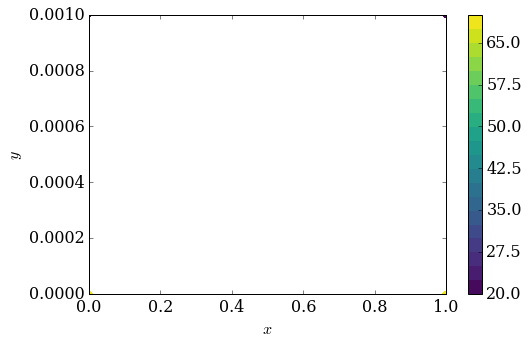

In [7]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,T,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [8]:
print(T)

[[ 70.   70.   70.  ...,  70.   70.   70. ]
 [ 69.5   nan   nan ...,   nan   nan  69.5]
 [ 69.    nan   nan ...,   nan   nan  69. ]
 ..., 
 [ 21.    nan   nan ...,   nan   nan  21. ]
 [ 20.5   nan   nan ...,   nan   nan  20.5]
 [ 20.   20.   20.  ...,  20.   20.   20. ]]


In [9]:
print(ui)

[[  0.   0.   0. ...,   0.   0.   0.]
 [  0.  nan  nan ...,  nan  nan   0.]
 [  0.  nan  nan ...,  nan  nan   0.]
 ..., 
 [  0.  nan  nan ...,  nan  nan   0.]
 [  0.  nan  nan ...,  nan  nan   0.]
 [  0.   0.   0. ...,   0.   0.   0.]]


In [10]:
print(pi)

[[ 9.7084665  9.7084665  9.7084665 ...,  9.7084665  9.7084665  9.7084665]
 [ 9.7119           nan        nan ...,        nan        nan  9.7119   ]
 [ 9.6138           nan        nan ...,        nan        nan  9.6138   ]
 ..., 
 [ 0.1962           nan        nan ...,        nan        nan  0.1962   ]
 [ 0.0981           nan        nan ...,        nan        nan  0.0981   ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]]
